# Fall Detection System for Elder Care

In [4]:
# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset=pd.read_csv("Data.csv")


In [8]:
dataset

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1,101.396,61.080,87.770,1,1
1,2.595,2,110.190,20.207,65.190,1,2
2,68.067,0,87.412,79.345,99.345,0,0
3,13.090,1,92.266,36.180,81.545,1,1
4,69.430,0,89.480,80.000,99.990,0,0
...,...,...,...,...,...,...,...
2034,5.655,2,116.310,162.242,71.310,1,2
2035,9.660,2,124.320,177.995,79.320,1,2
2036,15.220,1,93.828,40.440,82.610,1,1
2037,9.120,2,123.240,175.871,78.240,1,2


In [9]:
dataset.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1,101.396,61.080,87.770,1,1
1,2.595,2,110.190,20.207,65.190,1,2
2,68.067,0,87.412,79.345,99.345,0,0
3,13.090,1,92.266,36.180,81.545,1,1
4,69.430,0,89.480,80.000,99.990,0,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
Distance         2039 non-null float64
Pressure         2039 non-null int64
HRV              2039 non-null float64
Sugar level      2039 non-null float64
SpO2             2039 non-null float64
Accelerometer    2039 non-null int64
Decision         2039 non-null int64
dtypes: float64(4), int64(3)
memory usage: 111.6 KB


In [11]:
dataset.isnull().sum()

Distance         0
Pressure         0
HRV              0
Sugar level      0
SpO2             0
Accelerometer    0
Decision         0
dtype: int64

In [12]:
dataset.describe()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,28.694527,0.988720,95.657002,72.909243,83.563649,0.661599,0.988720
std,23.773644,0.815918,17.576499,46.940110,11.111592,0.473282,0.815918
min,0.000000,0.000000,60.000000,10.000000,60.000000,0.000000,0.000000
25%,7.642500,0.000000,82.418000,40.230000,75.285000,0.000000,0.000000
50%,20.560000,1.000000,97.238000,69.960000,85.280000,1.000000,1.000000
75%,55.205500,2.000000,109.695000,77.612500,92.692500,1.000000,2.000000
max,69.981000,2.000000,124.980000,179.293000,99.990000,1.000000,2.000000


In [13]:
dataset['Decision'].unique()

array([1, 2, 0], dtype=int64)

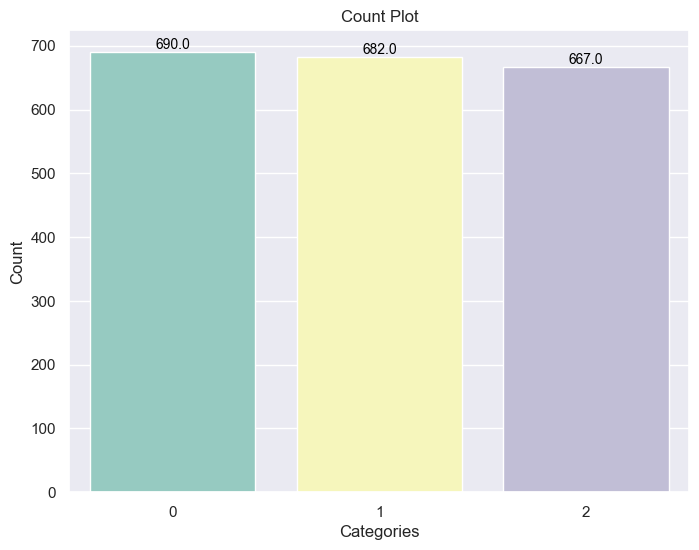

In [14]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x='Decision', data=dataset, palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [16]:
X=dataset.iloc[:,0:6]

In [17]:
X

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer
0,25.540,1,101.396,61.080,87.770,1
1,2.595,2,110.190,20.207,65.190,1
2,68.067,0,87.412,79.345,99.345,0
3,13.090,1,92.266,36.180,81.545,1
4,69.430,0,89.480,80.000,99.990,0
...,...,...,...,...,...,...
2034,5.655,2,116.310,162.242,71.310,1
2035,9.660,2,124.320,177.995,79.320,1
2036,15.220,1,93.828,40.440,82.610,1
2037,9.120,2,123.240,175.871,78.240,1


In [18]:
y=dataset.iloc[:,-1]

In [19]:
y

0       1
1       2
2       0
3       1
4       0
       ..
2034    2
2035    2
2036    1
2037    2
2038    0
Name: Decision, Length: 2039, dtype: int64

In [20]:
#Datasplitting

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)

In [22]:
X_train.shape

(1631, 6)

In [23]:
X_test.shape

(408, 6)

In [24]:
#Building a ML Model

In [25]:
labels=['NO fall detected','slipped/tripped','definite fall']

In [26]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [27]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# ExtraTreesClassifier

Model loaded successfully.
ExtraTreesClassifier Accuracy    : 67.64705882352942
ExtraTreesClassifier Precision   : 46.01156069364161
ExtraTreesClassifier Recall      : 66.66666666666666
ExtraTreesClassifier FSCORE      : 54.220779220779214

 ExtraTreesClassifier classification report
                   precision    recall  f1-score   support

NO fall detected       1.00      0.78      0.88       173
 slipped/tripped       0.00      0.00      0.00         0
   definite fall       1.00      0.60      0.75       235

        accuracy                           0.68       408
       macro avg       0.67      0.46      0.54       408
    weighted avg       1.00      0.68      0.80       408



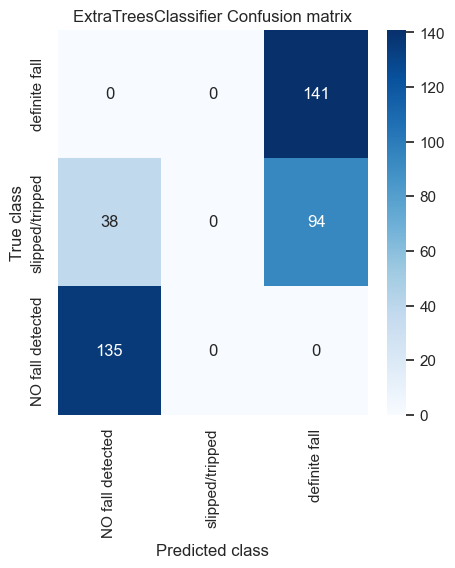

In [28]:
# Check if the model files exist
if os.path.exists('extratrees_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('extratrees_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("ExtraTreesClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = ExtraTreesClassifier(n_estimators=1, max_depth=1)
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'extratrees_model.pkl') 
    print("Model saved successfuly.")
    predict = clf.predict(X_test)
    calculateMetrics("ExtraTreesClassifier", predict, y_test)

# naive bayes Classifier

Model loaded successfully.
Naive Bayes Classifier Accuracy    : 100.0
Naive Bayes Classifier Precision   : 100.0
Naive Bayes Classifier Recall      : 100.0
Naive Bayes Classifier FSCORE      : 100.0

 Naive Bayes Classifier classification report
                   precision    recall  f1-score   support

NO fall detected       1.00      1.00      1.00       135
 slipped/tripped       1.00      1.00      1.00       132
   definite fall       1.00      1.00      1.00       141

        accuracy                           1.00       408
       macro avg       1.00      1.00      1.00       408
    weighted avg       1.00      1.00      1.00       408



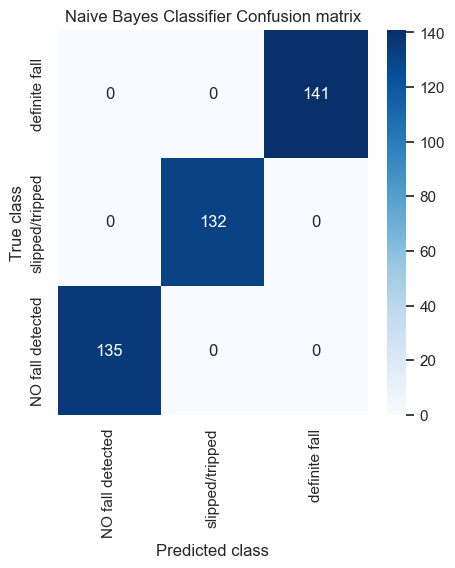

In [29]:
if os.path.exists('naive_bayes_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('naive_bayes_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("Naive Bayes Classifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'naive_bayes_model.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("Naive Bayes Classifier", predict, y_test)

In [30]:
#Performance Comparision of both the algorithmns

In [31]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["ExtraTreesClassifier","Naive Bayes Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,ExtraTreesClassifier,46.011561,66.666667,54.220779,67.647059
1,Naive Bayes Classifier,100.000000,100.000000,100.000000,100.000000


In [32]:
# prediction

In [33]:
test=pd.read_csv("test.csv")

In [34]:
test

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer
0,25.540,1,101.396,61.080,87.770,1
1,2.595,2,110.190,20.207,65.190,1
2,68.067,0,87.412,79.345,99.345,0
3,2.835,2,110.670,21.151,65.670,1
4,64.123,0,81.428,77.305,97.305,0
5,26.860,1,102.364,63.720,88.430,1
6,4.365,2,113.730,27.169,68.730,1
7,66.153,0,84.508,78.355,98.355,0
8,63.920,0,81.120,77.200,97.200,0
9,8.730,2,122.460,174.337,77.460,1


In [35]:
# Make predictions on the selected test data
predict = clf.predict(test)

# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 1:
        print(test.iloc[i])  
        print("Row {}:************************************************** NO fall detected".format(i)) 
    elif p == 2:
        print(test.iloc[i])  
        print("Row {}:************************************************** slipped/tripped".format(i))
    elif p == 0:
        print(test.iloc[i])  
        print("Row {}:************************************************** definite fall".format(i))


Distance          25.540
Pressure           1.000
HRV              101.396
Sugar level       61.080
SpO2              87.770
Accelerometer      1.000
Name: 0, dtype: float64
Row 0:************************************************** NO fall detected
Distance           2.595
Pressure           2.000
HRV              110.190
Sugar level       20.207
SpO2              65.190
Accelerometer      1.000
Name: 1, dtype: float64
Row 1:************************************************** slipped/tripped
Distance         68.067
Pressure          0.000
HRV              87.412
Sugar level      79.345
SpO2             99.345
Accelerometer     0.000
Name: 2, dtype: float64
Row 2:************************************************** definite fall
Distance           2.835
Pressure           2.000
HRV              110.670
Sugar level       21.151
SpO2              65.670
Accelerometer      1.000
Name: 3, dtype: float64
Row 3:************************************************** slipped/tripped
Distance         64